# Pre-Experiment
Define All Variables to Run the Experiment
    <p>```setup.bash``` Exports the Variables to a ```setup.conf``` and sends it to the server</p>

In [1]:
username=sgt43 # Username of user on server
exp_name=dsef-janus # Name of Experiment on TestBed
proj_name=cops # Name of Project on TestBed
default_node=node-0 # Default node to run the experiment from
ds=cops2
host_ip=users.emulab.net
host_servers_ip=emulab.net
default_ip=${default_node}.${exp_name}.${proj_name}.${host_servers_ip}
proj_path=/home/sgt43/DSEF

# Setup Number of Servers and Clients
nservers=2 # Number of Servers and Clients
ndcs=2 # Number of Data Centers
eindex=0
ipprefix="node-"
ippostfix=""
threads=1
replication_factor=$ndcs

# Initialize Consistent Variables
trial=1 # Number of Trials in the Experiment
nkeys=10000 # Number of keys for the Experiment
run_time=10 # Time to run the Expierment
trim=1 # Trimmed time from the gathered results

# Initialize Default Variables
value_size=128 # Size of the Value Read and/or Written
cols_per_key_read=5 # Columns per key read
cols_per_key_write=5 # Columns per key write
keys_per_read=5 # Keys per read
keys_per_write=5 # Keys per write
write_frac="0.1" # Fraction of Write Operations to Read Operations
write_trans_frac="0.5" # Fraction of Write Transcation to Read Transactions

# Specify the Experiment's Indepdent Variable and its Values
exp=keys_per_read # Name of the Experiment
indep_values="1:${nkeys} 2:${nkeys}" # Independent Variables to be Experimented with

insert_cmd=INSERTCL
KILLALL_SSH_TIME=90
MAX_ATTEMPTS=10

alias emulab="ssh ${username}@${host_ip} -o StrictHostKeyChecking=no"
alias server="ssh ${username}@${host_ip} -o StrictHostKeyChecking=no ssh ${default_ip} -t -t -o StrictHostKeyChecking=no"

source ${proj_path}/setup.bash

setup.conf
            432 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=0/1)
dynamic_common.bash
          7,261 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=0/1)
kodiak_dc_launcher.bash
          4,853 100%    0.00kB/s    0:00:00 (xfr#1, to-chk=0/1)


# Experiment
Launch Instances of the Distributed System
    
Setup Benchmark on Clients
    
Start the Experiment
    
Kill all Instances of the Distributed System

In [2]:
# emulab "/usr/testbed/bin/node_reboot -w -e ${proj_name},${exp_name}"

server <<- 'EOF'

source dynamic_common.bash

nserverstotal=$((ndcs*nservers))

init

for t in $(seq $trial); do
for i in $(seq 0 $((${#var[@]} - 1))); do

    kill_all_ds
        
    setup

    launch
    
    set_server_keyspace
    
    set_client_keyspace
        
    for (( j = 1; j<=$((nserverstotal)); j++)); do
        ssh -o StrictHostKeyChecking=no ${ipprefix}${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}" &
    done
    
    run_experiment
    
    kill_all_ds
    
    gather_results
    
    for (( j = 1; j<=$((nserverstotal)); j++)); do
        rsync --remove-source-files -az ${ipprefix}${j}:/tmp/${ds}* ${output_dir}
    done
    
done; done; exit; exit;
EOF

rm -rf ${proj_path}/latest

rsync -az --copy-links ${username}@${host_ip}:/users/${username}/${ds}/experiments/dynamic_${exp}/latest ${proj_path}

cd ${proj_path}/latest
mkdir data
for i in $(ls *.gz); do
    mv ${i} ./data/
    gunzip ./data/${i}
done

reboot (pc207): Attempting to reboot ...
reboot (pc208): Attempting to reboot ...
reboot (pc252): Attempting to reboot ...
reboot (pc257): Attempting to reboot ...
reboot (pc258): Attempting to reboot ...
Connection to pc208.emulab.net closed by remote host.
Connection to pc252.emulab.net closed by remote host.
Connection to pc207.emulab.net closed by remote host.
Connection to pc258.emulab.net closed by remote host.
Connection to pc257.emulab.net closed by remote host.
reboot (pc207): Successful!
reboot (pc208): Successful!
reboot (pc252): Successful!
reboot (pc257): Successful!
reboot (pc258): Successful!
reboot: Waiting (360s) for nodes to come up.
Still waiting for pc207 (PXEBOOTING) - it's been 1 minute(s).
Still waiting for pc207 (PXEBOOTING) - it's been 2 minute(s).
Still waiting for pc207 (TBSETUP) - it's been 3 minute(s).
reboot (pc207): alive and well.
reboot (pc208): alive and well.
Still waiting for pc252 (TBSETUP) - it's been 3 minute(s).
reboot (pc252): alive and well.
re

node-4: 3906,342,434,2170,271760,0.002453216374269006,18
node-3: /users/sgt43/cops2/kill_stress_kodiak.bash: line 6: kill: (2056) - No such process
node-4: /users/sgt43/cops2/kill_stress_kodiak.bash: line 6: kill: (2041) - No such process
[2]   Done                    ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}"
[3]   Done                    ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}"
[4]   Done                    ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}"
[5]   Done                    ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}"
[6]-  Done                    ssh $client -o StrictHostKeyChecking=no "cd ${src_dir}/tools/stress; 	    	((bin/stress --progress-interval=1 --nodes=$local_servers_csv --operation=DYNAMIC 	    	--consistency-level=LOCAL_QUORUM --replication-strat

[3]   Done                    ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}"
[4]   Done                    ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}"
[5]   Done                    ssh -o StrictHostKeyChecking=no node-${j} "collectl -P -ou -R $((run_time+20))s -f/tmp/${ds}_${t}"
[6]-  Done                    ssh $client -o StrictHostKeyChecking=no "cd ${src_dir}/tools/stress; 	    	((bin/stress --progress-interval=1 --nodes=$local_servers_csv --operation=DYNAMIC 	    	--consistency-level=LOCAL_QUORUM --replication-strategy=NetworkTopologyStrategy 	    	--strategy-properties=$strategy_properties --num-different-keys=$keys --stress-index=$index 	    	--stress-count=$num_nodes_per_dc --num-keys=20000000 --column-size=$value_size 	    	--columns-per-key-read=$cols_per_key_read --columns-per-key-write=$cols_per_key_write 	    	--keys-per-read=$keys_per_read --keys-per-write=$keys_per_w

# Data Gathering and Post Processing
Gather Data from Servers and Clients
    
Post Process the Data into Meaningful Chunks
    
Generate Graphs from the Data Chuncks

In [3]:
output_dir=${proj_path}/latest

source ${proj_path}/setup.conf
export ds

cd ${proj_path}/postprocess
./dynamic_postprocess_full.bash ${output_dir} ${output_dir} ${run_time} ${trim} shuffle

client0
  cops2/
    trial1/
    trial2/
done shuffling
rm: cannot remove '.trash': No such file or directory
  Client Postprocess: complete     
  Combining Clients: complete      2_5_0.1_0.5_10+2+tput      
  Client Postprocess: complete     
  Combining Clients: complete      2_5_0.1_0.5_10+2+tput      
/home/sgt43/DSEF/latest/cops2.graph
1	225	323	1616	204855
1	225	323	1616	204855
2	155	364	1820	231085
2	155	364	1820	231085


# Graphing with GNUPlot

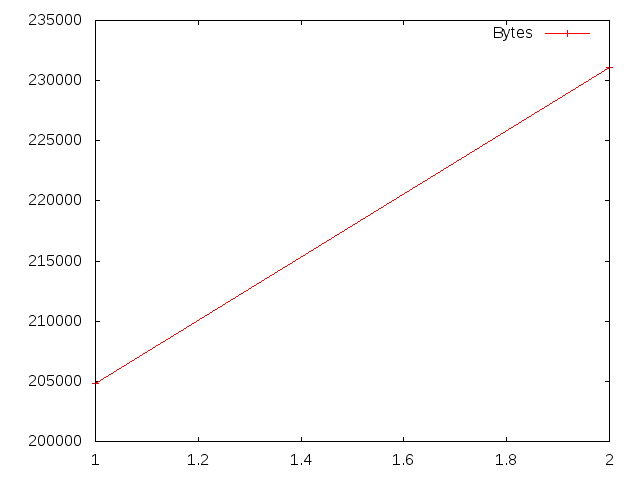

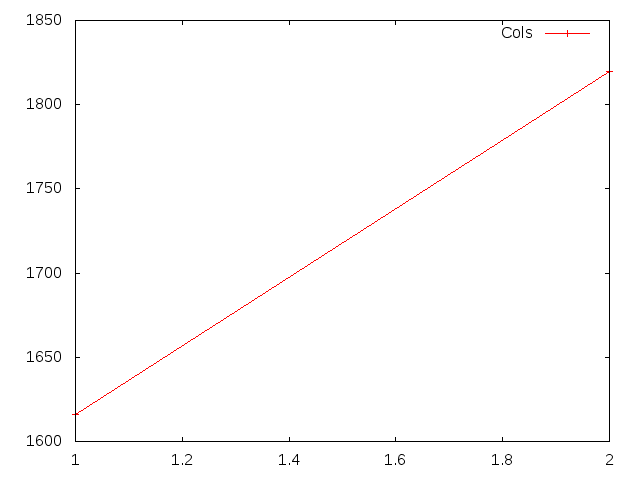

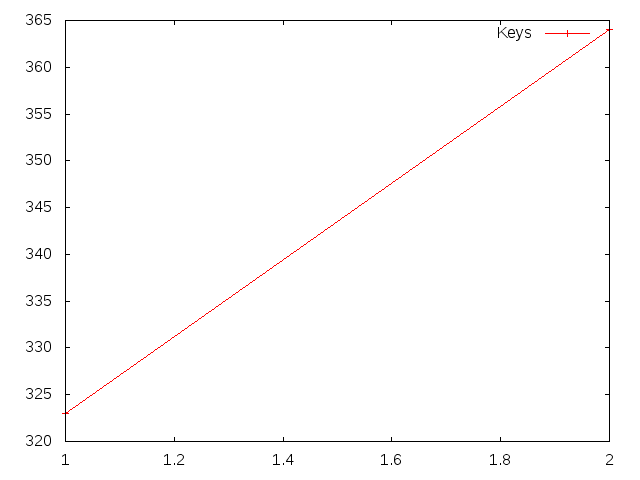

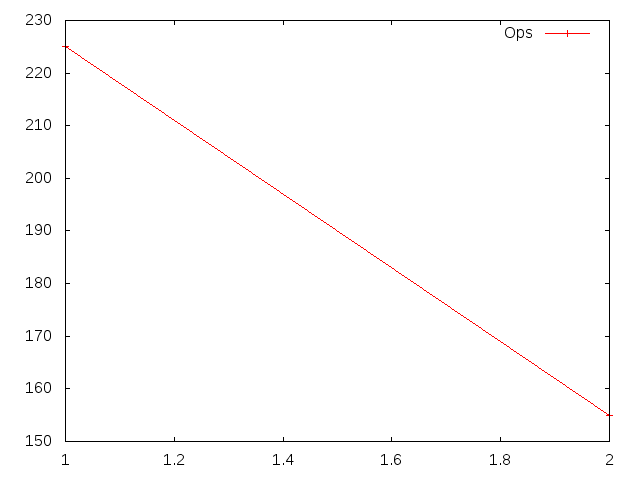

In [4]:
cd ${proj_path}/latest

source ${proj_path}/setup.conf
export ds

gnuplot <<- 'EOF'

    ds=system("echo ${ds}")
    
    set term png

    set output "bytes.png"
    plot ds.".graph" using 1:5 with linespoint title 'Bytes'

    set output "cols.png"
    plot ds.".graph" using 1:4 with linespoint title 'Cols'

    set output "keys.png"
    plot ds.".graph" using 1:3 with linespoint title 'Keys'

    set output "ops.png"
    plot ds.".graph" using 1:2 with linespoint title 'Ops'

EOF

display < bytes.png
display < cols.png
display < keys.png
display < ops.png

rm *.png